<a href="https://colab.research.google.com/github/pschofield2/machine_learning/blob/main/clustering_nfl_players_for_fantasy_football_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Fantasy Football Player Tiers Using KMeans Clustering Algorithm

The goal is to use a k-means clustering machine learning algorithm to help me visualize tiers of NFL players based on when they are on average expected to be picked in the draft. This could be very helpful for drafting a team.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
import seaborn as sns

In [12]:
# get data
df = pd.read_csv('/content/nfl_fantasy_concensus_picks.csv').dropna()
num_teams = 12 # assuming 12 team league
num_roster_spots = 16 # assuming 16 roster spots

draft_pool = num_teams * num_roster_spots # make draft pool only consist of top 192 players

df = df[:draft_pool]

print(df.shape)
df.head()

(192, 7)


,RK,Player,Team,Position,AVG,Min,Max
0,1,Christian McCaffrey,CAR,RB,1.2,1.0,2.0
1,2,Jonathan Taylor,IND,RB,2.0,1.0,3.0
2,3,Austin Ekeler,LAC,RB,4.4,2.0,7.0
3,4,Dalvin Cook,MIN,RB,5.4,4.0,7.0
4,5,Justin Jefferson,MIN,WR,6.0,3.0,10.0


Data Dictionary:

*   Player: Name of NFL Player
*   Team: Team Player Plays For
*   Position: Player's Position
*   AVG: Average Concensus Pick Number in Draft
*   Min: The lowest projected pick number for the player
*   Max: The highest projected pick number for the player

Min and Max provides a spread as to how high or low a player is expected to be taken. It will be interesting to visualize the players with high spreads.



### Initializing and fitting the model

*   We want to use the average projected pick number to build our clusters
*   Using 13 clusters to represent 13 rounds in the draft


In [13]:
pd.set_option('display.max_rows',None)

X = df[['AVG']].values # AVG is the average consensus pick number.

k = 13 # using 13 for k because generally 13 rounds.

model = KMeans(n_clusters = k)

model.fit(X)

labels = model.predict(X)
labels

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12], dtype=int32)

In [16]:
# build function to assign tiers to players

def assign_tiers(labels):
  unique_labels = []
  tiers = []

  for i in labels:
    if i not in unique_labels:
      unique_labels.append(i)

    tiers.append( # for each iteration, count how many values are in unique_values
        len(set(unique_labels))
      )

  return tiers

tiers = assign_tiers(labels)

df['Tier'] = tiers

df.set_index('Tier').head(100)

,RK,Player,Team,Position,AVG,Min,Max
Tier,,,,,,,
1,1,Christian McCaffrey,CAR,RB,1.2,1.0,2.0
1,2,Jonathan Taylor,IND,RB,2.0,1.0,3.0
1,3,Austin Ekeler,LAC,RB,4.4,2.0,7.0
1,4,Dalvin Cook,MIN,RB,5.4,4.0,7.0
1,5,Justin Jefferson,MIN,WR,6.0,3.0,10.0
1,6,Cooper Kupp,LAR,WR,7.0,3.0,10.0
1,7,Najee Harris,PIT,RB,8.6,4.0,12.0
1,8,Ja'Marr Chase,CIN,WR,8.8,4.0,11.0
1,9,D'Andre Swift,DET,RB,9.4,5.0,12.0


In [17]:
def make_clustering_viz(df, pos=None, figsize=(20, 20)):
    
    """
    Create a clustering visualization given our df.
    
    """
    # if pos is provided as an argument to the function.
    if pos:
        df = df.loc[df['Position'].str.contains(pos)]
    
    # some of these values are hexidecimal color codes.
    colors = ['purple', 'magenta', 'red', 'blue', 'orange', 'green',
              'salmon', 'yellow', 'black', 'grey', '#3498db', '#16a085', '#f4d03f', '#f1948a',
              '#48c9b0', '#3498db', '#e74c3c', '#d7bde2', '#d0d3d4']
    
    # create a dictionary with the keys of 1 -> 5, and the corresponding color for each tier.
    colors = dict(zip(range(1, k+1), colors[:k]))
    
    # set the figure size
    plt.figure(figsize=figsize)
    
    # plot Avg. vs. Rank. Our visualization will have Avg on the x-axis and ECR on the y-axis.
    plt.scatter(x=df['AVG'], 
                y=df['RK'], 
                c='#212f3d', # color of the point
                alpha=0.9, # 90% transparency
                s=7 # size 
                )
    
    yticks = [] # for storing player-names on the y-axis
    
    for _, row in df.iterrows():
        
        # we are going to plot a horizontal line along each point with a range stemming from
        # best (xmin) to worst (xmax) ranking.
        
        xmin = row['Max'] 
        xmax = row['Min']
        
        ymin, ymax = row['RK'], row['RK'] 
        
        player = row['Player'] # annotate the y-ticks with player names
        
        tier = row['Tier']
        
        # plot a horizontal line
        plt.plot((xmin, xmax), (ymin, ymax), c=colors.get(tier, 'black'), alpha=0.8) # plot each individual horizontal line with either the tier color value or black
        
        yticks.append(player) # append the yticks list with the player's name
    
    # this will be used for the legend
    patches = []
    for tier, color in colors.items():
        patch = mpatches.Patch(color=color, label=f'Tier {tier}') # legend label + color
        patches.append(patch)
    
    plt.legend(handles=patches, borderpad=1, fontsize=12) # update the legend with the patches
    
    # setting xlabel, ylabel and yticks (player names)
    plt.xlabel('Average Expert Rank', fontsize=12)
    plt.ylabel('Expert Consensus Rank', fontsize=12)
    plt.yticks(df['RK'], yticks, fontsize=12)
    
    # setting title
    plt.title('Tiers for the 2022 Draft. ECR vs. Average Expert Rank.', fontsize=12)
    
    # gca stands for get current axis. It's a roundabout way of grabbing the ax object like we
    plt.gca().invert_yaxis()
    plt.show()

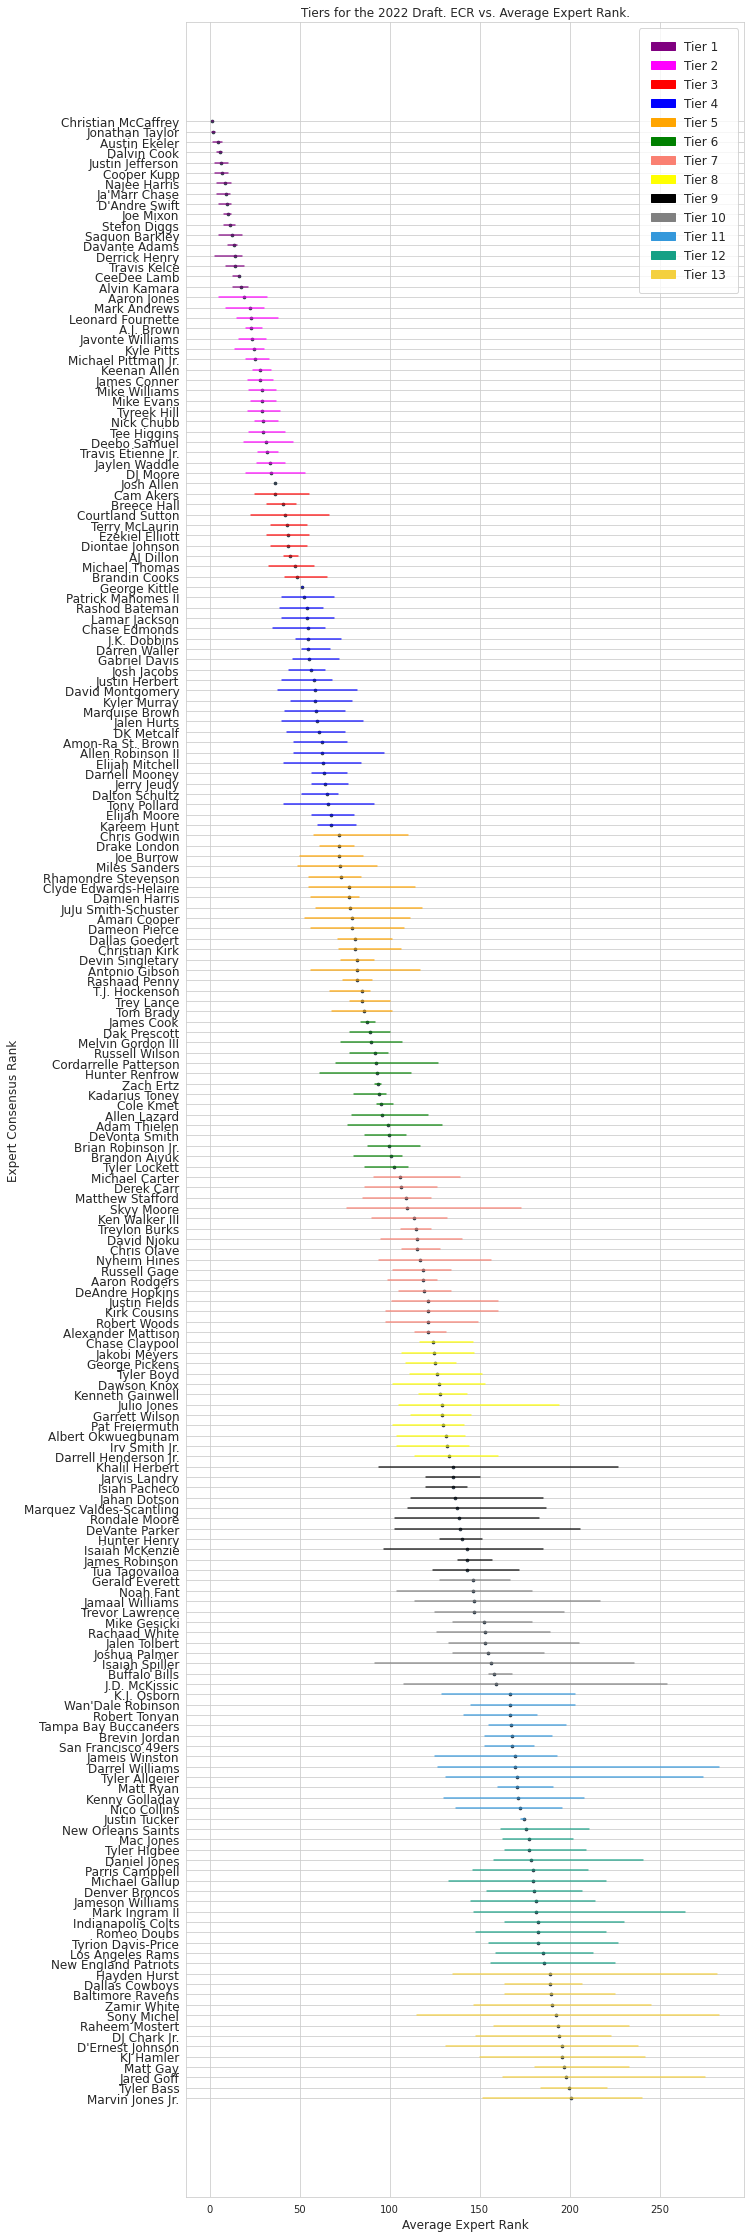

In [18]:
make_clustering_viz(df, figsize=(10, 40))

# Takeaways



*   It's interesting to that tight ends seem to have very low variability as to where they will be taken
*   Rookies seem to have the most variability as to when they will be taken. This makes sense because we haven't seen them play in the NFL yet and have less visibility into how they will be used.
*   It would be interesting to see what this viz would look like if i used the elbow method to establish the number of clusters opposed to hard coding 13 clusters.

